In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
conn = pymysql.connect(host="localhost",
                       database="firstkino",
                       user="kdigital",
                       password="mysql",
                       charset="utf8")

all_MovieGenre = []
with conn.cursor() as cursor:
    cursor.execute("""
                    SELECT m.movieCd, movieNm, g.*
                    FROM movie m
                    LEFT OUTER JOIN moviegenre mg
                    ON m.moviecd = mg.moviecd
                    LEFT OUTER JOIN genre g
                    ON mg.genrecd = g.genrecd
                   """)
    genres = cursor.fetchall()
    all_MovieGenre.append(genres)



In [4]:
MovieGenre_content = pd.DataFrame(genres, columns=['movieCd', 'movieNm', 'genreCd', 'genreNm'])
MovieGenre_content

,movieCd,movieNm,genreCd,genreNm
0,19158001,국가의 탄생,2,서부극(웨스턴)
1,19158001,국가의 탄생,11,드라마
2,19158001,국가의 탄생,14,전쟁
3,19188001,개의 일생,5,코미디
4,19190002,여름밤의 기묘한 이야기,7,공포(호러)
...,...,...,...,...
73025,20219978,볼레로 만들기,10,기타
73026,20219984,어디에도 없는 시간,11,드라마
73027,20219993,청수탕 사람들,5,코미디
73028,20219993,청수탕 사람들,11,드라마


In [5]:
genre_count = MovieGenre_content['genreNm'].value_counts()

In [6]:
# matplotlib 폰트 설정

path = "C:/Windows/Fonts/malgun.ttf"
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
print(font_name)

mpl.rc('font', family=font_name) # rc: 속성을 설정하는 함수

Malgun Gothic


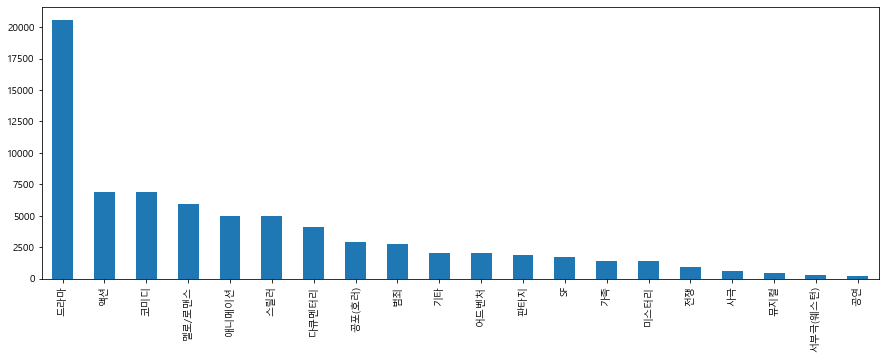

In [7]:
plt.figure(figsize=(15,5))
genre_count.plot(kind="bar")
plt.show()

In [8]:
conn = pymysql.connect(host="localhost",
                       database="firstkino",
                       user="kdigital",
                       password="mysql",
                       charset="utf8")

all_actor = []
with conn.cursor() as cursor:
    cursor.execute("""
                    SELECT actorCd from actor
                   """)
    actors = cursor.fetchall()
    all_actor.append(actors)

In [9]:
len(all_actor[0])

41139

In [10]:
conn = pymysql.connect(host="localhost",
                       database="firstkino",
                       user="kdigital",
                       password="mysql",
                       charset="utf8")

all_director = []
with conn.cursor() as cursor:
    cursor.execute("""
                    SELECT directorCd from director
                   """)
    directors = cursor.fetchall()
    all_director.append(directors)

In [11]:
len(all_director[0])

23466

In [12]:
conn = pymysql.connect(host="localhost",
                       database="firstkino",
                       user="kdigital",
                       password="mysql",
                       charset="utf8")

all_MovieActor = []
with conn.cursor() as cursor:
    cursor.execute("""
                    SELECT ma.*, a.*
                    FROM MovieActor ma
                    LEFT OUTER JOIN Actor a
                    ON ma.actorCd = a.actorCd
                   """)
    actors = cursor.fetchall()
    all_MovieActor.append(actors)

In [13]:
MovieActor_content = pd.DataFrame(actors, columns=['movieCd', 'actorCd', 'actorCd', 'actorNm', 'actorNmEn'])
MovieActor_content

,movieCd,actorCd,actorCd,actorNm,actorNmEn
0,19198001,1,1,,None
1,19228005,1,1,,None
2,19230005,1,1,,None
3,19238001,1,1,,None
4,19248001,1,1,,None
...,...,...,...,...,...
146900,20140058,41137,41137,메건 에드워즈,None
146901,20182530,41138,41138,오민준,None
146902,20184341,41138,41138,오민준,None
146903,20192697,41138,41138,오민준,None


In [14]:
movieactor_content2 = MovieActor_content.drop(MovieActor_content.loc[MovieActor_content['actorNm'] == ''].index)
actor_count = movieactor_content2['actorNm'].value_counts()
actor_count_dict = actor_count.to_dict()

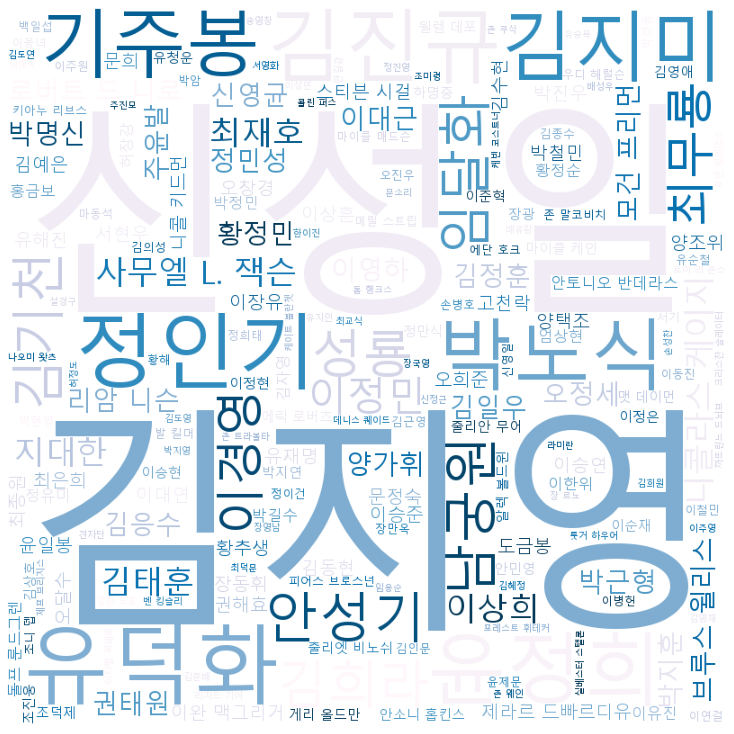

In [21]:
total = sum(actor_count_dict.values())

for key in actor_count_dict:
    actor_count_dict[key] /= total

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white', colormap='PuBu',
                      min_font_size=10, font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(actor_count_dict)

plt.figure(figsize=(10,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
conn = pymysql.connect(host="localhost",
                       database="firstkino",
                       user="kdigital",
                       password="mysql",
                       charset="utf8")

all_moviedirector = []
with conn.cursor() as cursor:
    cursor.execute("""
                    SELECT md.*, d.*
                    FROM MovieDirector md
                    LEFT OUTER JOIN Director d
                    ON md.directorCd = d.directorCd
                   """)
    directors = cursor.fetchall()
    all_moviedirector.append(directors)

In [23]:
moviedirector_content = pd.DataFrame(directors, columns=['movieCd', 'directorCd', 'directorCd', 'directorNm', 'directorNmEn'])
moviedirector_content2 = moviedirector_content.drop(moviedirector_content.loc[moviedirector_content['directorNm'] == ''].index)
director_count = moviedirector_content2['directorNm'].value_counts()
director_count_dict = director_count.to_dict()

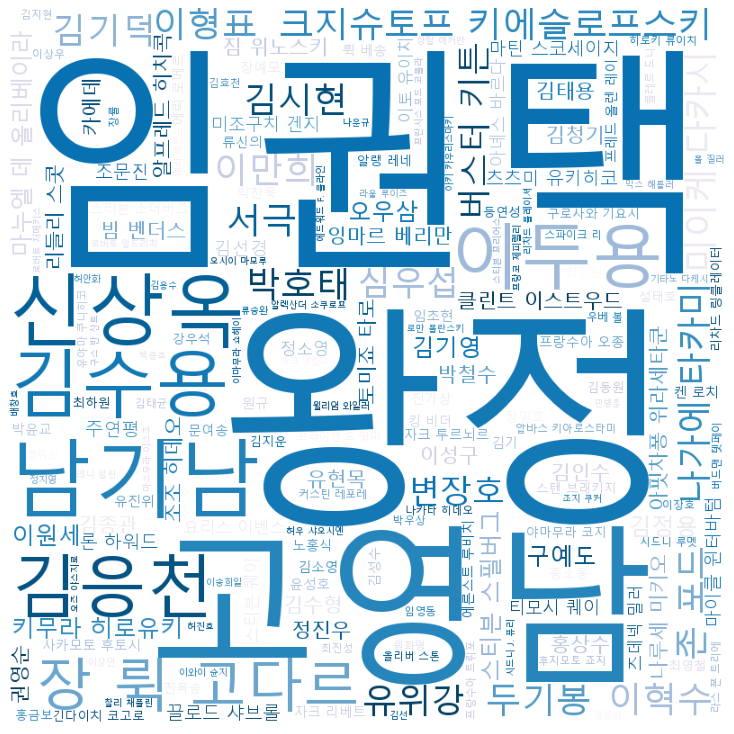

In [24]:
director_total = sum(director_count_dict.values())

for key in director_count_dict:
    director_count_dict[key] /= director_total

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white', colormap='PuBu',
                      min_font_size=10, font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(director_count_dict)

plt.figure(figsize=(10,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()